In [17]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [571]:
from distgen.reader import reader
from distgen.writers import get_writer
from distgen.generator import generator
#from drivers.DistGen import run_distgen
from distgen.plot import *

In [589]:
# Basic Example using a json file:
# The distgen reader assumes the input file is json formatted.  If not it, it defaults to parsing the file as an ascii txt file.
filename = "rad.gaussian.in.json"
par = reader(filename,verbose=1)
p = par.read()

Reading file 'rad.gaussian.in.json'...done. Time Ellapsed: 783.21 microsecond


In [515]:
dict(p)

{'beam': {'start_type': 'cathode',
  'rand_type': 'hammersley',
  'particle_count': 200000,
  'params': {'total_charge': {'value': 10, 'units': 'pC'},
   'MTE': {'value': 150, 'units': 'meV'}}},
 'r_dist': {'type': 'radial_gaussian',
  'params': {'sigma_xy': {'value': 1, 'units': 'mm'}}},
 't_dist': {'type': 'uniform',
  'params': {'min_t': {'value': -10, 'units': 'ps'},
   'max_t': {'value': 10, 'units': 'ps'}}},
 'output': {'type': 'gpt', 'file': 'rad.gaussian.out.txt'}}

In [590]:
# Generator is the main object that creates a beam distribution
gen = generator(verbose=1) # Create a generator object
gen.parse_input(p)         # Parse input structure
beam,outfile = gen.get_beam() # Generate distribution, return the beam and the desired outputfile
beam.print_stats()

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution: radial Gaussian
      sigma_xy = 2.000 mm
      Assuming cylindrical symmetry...
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.907 eV/c, sigma_pz -> 166.884 eV/c
...done. Time Ellapsed: 290.64 millisecond.

Beam stats:
   avg_x = 0.000 mm, sigma_x = 2.000 mm
   avg_y = -0.000 mm, sigma_y = 2.000 mm
   avg_z = 0.000 m, sigma_z = 0.000 m
   avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   avg_pz = 220.907 eV/c, sigma_pz = 166.884 eV/c
   avg_t = 0.000 s, sigma_t = 0.000 s

In [517]:
# The beam object allows access to the beam coordinates via [...]
x = beam["x"]
print(x)

[0.3593411  1.28597117 0.86577977 ... 1.42089512 0.98699372 2.0821577 ] millimeter


In [511]:
# The bunch charge is given by beam.q
beam.q

10 <Unit('picocoulomb')>

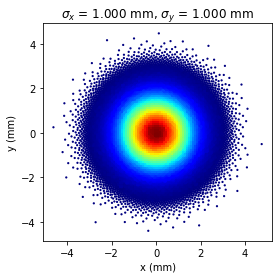

In [547]:
# The distgen module has some basic plotting routines
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

units = {"x":"mm","y":"mm","px":"keV/c","py":"keV/c","t":"ps","q":"pC"}

# plot_2d allows for plotting a 2D subspace of the beam coordinates:

fig=plt.figure(1)
# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal")

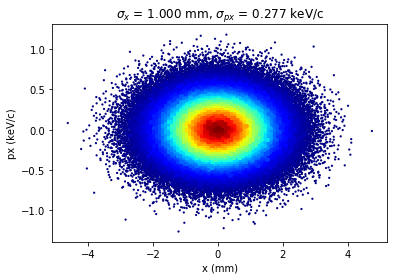

In [545]:
# X-Px Plot
fig.add_subplot(1,3,2)
plot_2d(beam,1,"x",units["x"],"px",units["px"],'scatter_hist2d',nbins=100)

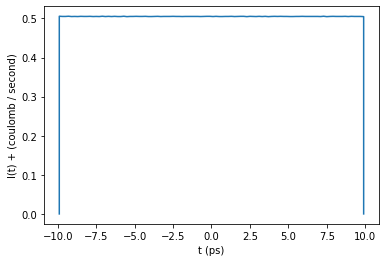

In [544]:
# Laser Current Profile
plot_current_profile(beam,1,units)